In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

# Introduction 
In this notebook, we will take a look at the **keystrokes data** provided by collected users while typing certain text provided by us.
We wil show the data that is provided and try to apply it to machine learning algorithms to conduct a research how well some of the AI algorithms will perform with data in our dataset.

## Comments
We are aware that our results may be somewhat skewd because of the scale in which we prepared data. The scale is rather small and unscalable, because of only **15** subjects. We also skipped a few paramteres related to **Down down time** of shift keys, because they are strictly connected to other keys *(which caused weird measurements in our dataset)*.
Despite the above we were still intrested if data provided by our software could be classified by generic AI algorithms.

---

# Understanding data

In [174]:
# Reading the data
df = pd.read_csv('results.csv', na_values='NaN', index_col=False)
# Peak at the data
df

,subject,attempt,f_DD,f_H,j_DD,j_H,shift_DD,shift_H,a_DD,a_H,r_DD,r_H,@_DD,@_H,shift_DD.1,shift_H.1,s_DD,s_H,shift_DD.2,shift_H.2,e_DD,e_H,6_DD,6_H,9_DD,9_H
0,0,0,0,101,776,125,0,329,380,103,449,180,793,98,0.0,226.0,653,140,0,286,692,118,1454,110,268,118
1,0,1,0,103,442,112,0,269,271,118,326,137,983,160,0.0,319.0,708,125,0,416,398,125,1219,168,286,94
2,0,2,0,113,631,112,0,212,315,125,290,135,702,116,0.0,232.0,534,145,0,258,335,182,1153,124,310,70
3,0,3,0,91,543,120,0,312,341,110,321,97,662,91,0.0,412.0,688,149,0,348,377,132,1372,103,329,86
4,0,4,0,111,909,107,0,255,258,121,278,108,826,73,0.0,385.0,1044,117,0,385,475,120,1047,116,774,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,14,95,0,99,248,137,0,188,138,103,151,103,290,137,0.0,295.0,370,137,0,269,252,112,662,117,118,95
1496,14,96,0,78,232,127,0,201,162,116,134,131,296,122,0.0,271.0,306,111,0,246,241,104,691,117,118,95
1497,14,97,0,99,220,136,0,219,180,111,155,103,320,120,0.0,303.0,316,137,0,261,290,119,569,121,123,86
1498,14,98,0,103,227,137,0,228,223,111,699,86,336,118,0.0,297.0,327,103,0,254,241,103,649,113,114,78


## From raw data to DataFrame

Raw data provided by the software looks like this:
![Raw data](img/raw_example.png)
Where format is:
    1. key;Hold_time;DownDown_time
    2. ; - data separator
    3. : - attempt separator

## Comments
How many subjects that many capital keys, so we are aware that our users use: *only one shift*, *both of them* or *using caps lock* but we are processing raw input with the intent to standarasie every capital type as **shift** attribute. It makes further data handling easier.

In [175]:
# Mean and standard deviation for columns
stats = df.groupby(by=["subject"]).describe()
stats.iloc[:, (stats.columns.get_level_values(1)=='mean') | (stats.columns.get_level_values(1)=='std')]

attempt            f_DD          f_H               j_DD              \
           mean        std mean  std    mean        std    mean         std   
subject                                                                       
0          49.5  29.011492  0.0  0.0  102.32  11.259008  616.04  327.907844   
1          49.5  29.011492  0.0  0.0   96.54  11.584054  473.52  455.835264   
2          49.5  29.011492  0.0  0.0  111.79  10.416862  280.73   56.253189   
3          49.5  29.011492  0.0  0.0   67.54  15.381624  357.95  198.005019   
4          49.5  29.011492  0.0  0.0   84.37  16.682813  583.65  474.519116   
5          49.5  29.011492  0.0  0.0   94.38  13.208338  447.17  279.645557   
6          49.5  29.011492  0.0  0.0   63.74  11.420007  345.12  341.841900   
7          49.5  29.011492  0.0  0.0   59.69  11.220197  306.97   69.566400   
8          49.5  29.011492  0.0  0.0  113.31  13.758153  353.81   96.384195   
9          49.5  29.011492  0.0  0.0   57.34  11.887707  312.93  110.892728   
10         49.5  29.011492  0.0  0.0   83.40   8.321810  312.87   68.174858   
11         49.5  29.011492  0.0  0.0   62.79   8.630806  361.88   74.489546   
12         49.5  29.011492  0.0  0.0   90.70  15.456358  597.99  327.949845   
13         49.5  29.011492  0.0  0.0   88.58   9.126695  144.53   55.590395   
14         49.5  29.011492  0.0  0.0   96.80  10.935994  411.27  231.214442   

            j_H            shift_DD      shift_H                 a_DD  ...  \
           mean        std     mean  std    mean          std    mean  ...   
subject                                                                ...   
0        110.37  11.723804      0.0  0.0  262.70    76.729158  298.87  ...   
1        103.80  12.369725      0.0  0.0  253.38    61.022728  390.32  ...   
2        124.64  11.471986      0.0  0.0  153.89    25.397007  171.77  ...   
3         53.97   7.137120      0.0  0.0  274.30   129.159091  257.62  ...   
4         79.11  10.074365      0.0  0.0  127.56    24.907230  291.00  ...   
5        110.39  12.041926      0.0  0.0  288.77   204.763320  193.34  ...   
6         68.35  11.024651      0.0  0.0  248.27    66.275954  234.30  ...   
7         55.31   9.266748      0.0  0.0  187.32    29.673945  215.51  ...   
8         84.14   9.255105      0.0  0.0  109.36     8.571176  321.37  ...   
9         69.08  10.453050      0.0  0.0  177.17    77.039155  160.76  ...   
10        81.77   6.702713      0.0  0.0  146.05    37.652418  176.21  ...   
11       100.82  14.766451      0.0  0.0  312.72  1258.931189  184.50  ...   
12       106.86  16.077477      0.0  0.0  307.82    90.312407  299.60  ...   
13        74.20   8.640988      0.0  0.0  129.24    15.934918  110.57  ...   
14       114.78  13.199770      0.0  0.0  266.12    58.344203  266.37  ...   

        shift_DD.2 shift_H.2                e_DD                 e_H  \
               std      mean         std    mean         std    mean   
subject                                                                
0              0.0    319.55  124.263599  381.92  264.897223  127.64   
1              0.0    231.15   89.868633  266.45   64.900915   95.54   
2              0.0    245.07  111.692874  205.23   33.898796  106.54   
3              0.0    734.85  547.656096  444.52  294.817508   62.50   
4              0.0    129.58   27.665455  278.28  113.204390   70.12   
5              0.0    565.28  205.750564  459.54  357.489010  107.58   
6              0.0    471.01  214.666502  373.09  224.854301   78.05   
7              0.0    508.10  118.986503  347.88  133.437329   56.70   
8              0.0    128.50   19.427410  336.56  121.156158  110.55   
9              0.0    209.12   74.790114  214.94   68.418619   74.88   
10             0.0    324.14  415.371685  400.94  356.044567   92.43   
11             0.0    191.28   55.809394  210.35   74.265205   71.46   
12             0.0    513.22  311.519365  478.69  222.339930  103.98   
13             0.0    120.97

In [176]:
# Check if columns has 0 
(df==0).sum().apply(lambda x: bool(x))

subject        True
attempt        True
f_DD           True
f_H           False
j_DD          False
j_H           False
shift_DD       True
shift_H       False
a_DD          False
a_H           False
r_DD          False
r_H           False
@_DD          False
@_H           False
shift_DD.1     True
shift_H.1     False
s_DD          False
s_H           False
shift_DD.2     True
shift_H.2     False
e_DD          False
e_H           False
6_DD          False
6_H           False
9_DD          False
9_H           False
dtype: bool

Aside from **Subject**, **Attempt**, **f_DD** and **shift_DD.*i*** if any other column has 0 that means that something went wrong with the preprocessing into csv file.

In [177]:
# Info (check that every column was read with correct type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 26 columns):
subject       1500 non-null int64
attempt       1500 non-null int64
f_DD          1500 non-null int64
f_H           1500 non-null int64
j_DD          1500 non-null int64
j_H           1500 non-null int64
shift_DD      1500 non-null int64
shift_H       1500 non-null int64
a_DD          1500 non-null int64
a_H           1500 non-null int64
r_DD          1500 non-null int64
r_H           1500 non-null int64
@_DD          1500 non-null int64
@_H           1500 non-null int64
shift_DD.1    1143 non-null float64
shift_H.1     1143 non-null float64
s_DD          1500 non-null int64
s_H           1500 non-null int64
shift_DD.2    1500 non-null int64
shift_H.2     1500 non-null int64
e_DD          1500 non-null int64
e_H           1500 non-null int64
6_DD          1500 non-null int64
6_H           1500 non-null int64
9_DD          1500 non-null int64
9_H           1500 non-null int64
dtype

## Columns description
<img src="https://www.researchgate.net/profile/Saket-Maheshwary/publication/322952671/figure/fig1/AS:590982592626691@1517912638914/Illustration-of-keystroke-timing-features-given-as-inputs-to-Deep-Secure.png" width="500" alt="columns_names_explanation"/>


Source of image by Saket Maheshwary: [Deep Secure: A Fast and Simple Neural Network based approach for User Authentication and Identification via Keystroke Dynamics](https://www.researchgate.net/figure/Illustration-of-keystroke-timing-features-given-as-inputs-to-Deep-Secure_fig1_322952671)


* Subject - Is a id of the subject, who provided current record
* Attempt - Is a number of a attempt of corresponding user marked with id.
* *Key_name*_DD - Is a press to press (down down) time of previous key to a next key, where previous key is prvoided as *Key_name*
* *Key_name*_H - Is a hold time of a corresponding key name 

## Comments
We didn't used *UD_time*, because this time is implied by 2 other measured factors, to be exact $UD = DD - H$.

### NaN Values

In [178]:
# Check if there are any NaN's
df.isna().any()

subject       False
attempt       False
f_DD          False
f_H           False
j_DD          False
j_H           False
shift_DD      False
shift_H       False
a_DD          False
a_H           False
r_DD          False
r_H           False
@_DD          False
@_H           False
shift_DD.1     True
shift_H.1      True
s_DD          False
s_H           False
shift_DD.2    False
shift_H.2     False
e_DD          False
e_H           False
6_DD          False
6_H           False
9_DD          False
9_H           False
dtype: bool

The **NaN** values that occured are from software deviations i.e. not recognizing correctly shift key after **@**

In [179]:
# The NaN values
df[df.isna().any(axis=1)]

,subject,attempt,f_DD,f_H,j_DD,j_H,shift_DD,shift_H,a_DD,a_H,r_DD,r_H,@_DD,@_H,shift_DD.1,shift_H.1,s_DD,s_H,shift_DD.2,shift_H.2,e_DD,e_H,6_DD,6_H,9_DD,9_H
107,1,7,0,90,354,106,0,202,399,132,321,98,786,107,NaN,NaN,276,101,0,728,455,95,575,127,79,111
246,2,46,0,132,279,120,0,142,166,179,90,136,331,113,NaN,NaN,960,118,0,1225,201,111,213,117,100,89
312,3,12,0,86,1212,58,0,1087,242,146,97,105,985,69,NaN,NaN,598,80,0,1569,509,68,633,59,431,34
313,3,13,0,74,244,56,0,247,267,112,90,89,412,113,NaN,NaN,331,110,0,708,320,73,857,42,652,58
315,3,15,0,46,284,53,0,219,236,116,93,73,321,100,NaN,NaN,327,76,0,627,348,56,1118,36,442,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,12,67,0,95,495,96,0,288,256,104,296,96,559,96,NaN,NaN,664,103,0,1376,695,96,695,95,168,103
1268,12,68,0,96,471,120,0,336,296,112,471,96,503,104,NaN,NaN,383,80,0,783,400,103,695,112,215,96
1270,12,70,0,112,480,120,0,256,239,143,375,88,464,120,NaN,NaN,311,120,0,752,447,120,607,112,207,104
1272,12,72,0,88,415,120,0,311,247,104,256,104,503,128,NaN,NaN,519,104,0,1000,584,96,695,128,207,104


Let's fill the NaN values with average for corresponding users, (shift_DD fill with 0 as it should be)


In [180]:
df['shift_DD.1'] = 0.0

In [181]:
# Groupby by subjects and get their mean of shift_H column
means_shift = df.groupby(by=["subject"])['shift_H.1'].mean()

# For every user choose a rows of that user when there is NaN in column shift_H.1 and replace NaNs with adequate mean
for user in df['subject'].unique():
    df.loc[(df['subject']==user) & (df['shift_H.1'].isna()), 'shift_H.1'] = means_shift[user]

## How algorithms will do in simple users classification
We will use some AI algorithms to see results of training models with user data  

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# For ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [183]:
# We don't need the attempt column
df.drop('attempt', axis=1, inplace=True)
# We also don't need columns with all 0, because it only impacts dimensionality of our dataset
df = df.loc[:, (df != 0).any(axis=0)]
df 

,subject,f_H,j_DD,j_H,shift_H,a_DD,a_H,r_DD,r_H,@_DD,@_H,shift_H.1,s_DD,s_H,shift_H.2,e_DD,e_H,6_DD,6_H,9_DD,9_H
0,0,101,776,125,329,380,103,449,180,793,98,226.0,653,140,286,692,118,1454,110,268,118
1,0,103,442,112,269,271,118,326,137,983,160,319.0,708,125,416,398,125,1219,168,286,94
2,0,113,631,112,212,315,125,290,135,702,116,232.0,534,145,258,335,182,1153,124,310,70
3,0,91,543,120,312,341,110,321,97,662,91,412.0,688,149,348,377,132,1372,103,329,86
4,0,111,909,107,255,258,121,278,108,826,73,385.0,1044,117,385,475,120,1047,116,774,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,14,99,248,137,188,138,103,151,103,290,137,295.0,370,137,269,252,112,662,117,118,95
1496,14,78,232,127,201,162,116,134,131,296,122,271.0,306,111,246,241,104,691,117,118,95
1497,14,99,220,136,219,180,111,155,103,320,120,303.0,316,137,261,290,119,569,121,123,86
1498,14,103,227,137,228,223,111,699,86,336,118,297.0,327,103,254,241,103,649,113,114,78


In [184]:
# Split into attributes and labels
X = df.drop('subject', axis=1)
y = df['subject']

As the metric we will use **accuracy** as we have exactly balanced classes,
so accuracy should be sufficient.

In [185]:
# Let's do training with cross validation to get the performance of models 

# Lists to hold metric (accuracy) of models
svm_scores = []
knn_scores = []

# 75% (train) / 25% (test)
skf = StratifiedKFold(n_splits=4, random_state=101, shuffle=True)
skf.get_n_splits(X, y)

# We are cross validating with k=4 folds (stratified sampling) in for loop
for train_index, test_index in skf.split(X, y):
    # Get the train/test sets
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Scaling data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Fit models
    svc_m = SVC().fit(X_train, y_train)
    knn_m = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    
    # Add metrics based on current fold's predictions
    svm_scores.append(accuracy_score(y_test, svc_m.predict(X_test)))
    knn_scores.append(accuracy_score(y_test, knn_m.predict(X_test)))

print('Scores of models for 4 fold stratified cross validation')
print(f'SVC score: {np.mean(svm_scores):.2f}')
print(f'KNN score: {np.mean(knn_scores):.2f}')

Scores of models for 4 fold stratified cross validation
SVC score: 0.93
KNN score: 0.92


In [186]:
# We also try to test ANN
ann = Sequential()
# Adding to model one hidden layer with 20 neurons and setting input dimensionality to number of features
ann.add(Dense(units=20, input_dim=20, activation='relu'))
# Adding some dropouts in layer, arbitrary percentage
ann.add(Dropout(0.2))
# Output layer with neurons equal to classes (subjects)
ann.add(Dense(units=len(y.unique()), activation='softmax'))

# For a two or more label classes classification problem
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [187]:
# Split the data (stratified sampling)
# Also we have to one hot encode the classes
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=101, stratify=y)
# Saving labels
y_labels = y_test
# Encoding y
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [188]:
# Before training we have to scale data (we chose the MinMax scaler)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
# Training
ann.fit(x=X_train, 
          y=y_train, 
          epochs=120,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/120
33/33 [==============================] - 0s 5ms/step - loss: 2.6928 - accuracy: 0.1086 - val_loss: 2.6868 - val_accuracy: 0.1467
Epoch 2/120
33/33 [==============================] - 0s 2ms/step - loss: 2.6667 - accuracy: 0.1238 - val_loss: 2.6643 - val_accuracy: 0.1822
Epoch 3/120
33/33 [==============================] - 0s 2ms/step - loss: 2.6453 - accuracy: 0.1286 - val_loss: 2.6399 - val_accuracy: 0.2133
Epoch 4/120
33/33 [==============================] - 0s 2ms/step - loss: 2.6177 - accuracy: 0.1638 - val_loss: 2.6062 - val_accuracy: 0.2289
Epoch 5/120
33/33 [==============================] - 0s 2ms/step - loss: 2.5844 - accuracy: 0.1781 - val_loss: 2.5696 - val_accuracy: 0.2289
Epoch 6/120
33/33 [==============================] - 0s 2ms/step - loss: 2.5381 - accuracy: 0.1895 - val_loss: 2.5304 - val_accuracy: 0.2200
Epoch 7/120
33/33 [==============================] - 0s 2ms/step - loss: 2.5009 - accuracy: 0.2095 - val_loss: 2.4917 - val_accuracy: 0.2689
Epoch 8/120
3

Epoch 59/120
33/33 [==============================] - 0s 2ms/step - loss: 0.9647 - accuracy: 0.7552 - val_loss: 1.0040 - val_accuracy: 0.8733
Epoch 60/120
33/33 [==============================] - 0s 2ms/step - loss: 0.9605 - accuracy: 0.7429 - val_loss: 0.9987 - val_accuracy: 0.8711
Epoch 61/120
33/33 [==============================] - 0s 2ms/step - loss: 0.9387 - accuracy: 0.7610 - val_loss: 0.9891 - val_accuracy: 0.8711
Epoch 62/120
33/33 [==============================] - 0s 2ms/step - loss: 0.9500 - accuracy: 0.7400 - val_loss: 0.9814 - val_accuracy: 0.8733
Epoch 63/120
33/33 [==============================] - 0s 1ms/step - loss: 0.9142 - accuracy: 0.7610 - val_loss: 0.9733 - val_accuracy: 0.8756
Epoch 64/120
33/33 [==============================] - 0s 2ms/step - loss: 0.9240 - accuracy: 0.7724 - val_loss: 0.9673 - val_accuracy: 0.8756
Epoch 65/120
33/33 [==============================] - 0s 2ms/step - loss: 0.8893 - accuracy: 0.7771 - val_loss: 0.9615 - val_accuracy: 0.8733
Epoch 

33/33 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.8181 - val_loss: 0.8597 - val_accuracy: 0.8978
Epoch 117/120
33/33 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.8333 - val_loss: 0.8625 - val_accuracy: 0.8911
Epoch 118/120
33/33 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.8200 - val_loss: 0.8618 - val_accuracy: 0.8978
Epoch 119/120
33/33 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.8333 - val_loss: 0.8587 - val_accuracy: 0.8956
Epoch 120/120
33/33 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.8238 - val_loss: 0.8591 - val_accuracy: 0.8956


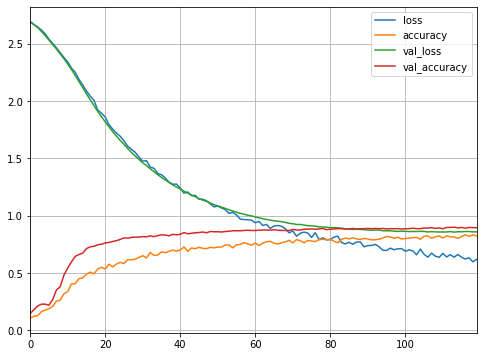

In [190]:
# We can see loss and accuracy of training set and validation set
# After ~120 epchos the model gets overtrained
model_loss = pd.DataFrame(ann.history.history)
model_loss.plot(figsize=(8,6), grid=True)

In [191]:
# How ANN performed
predictions = np.argmax(ann.predict(X_test), axis=-1)
print(classification_report(y_labels, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.79      0.90      0.84        30
           2       0.94      1.00      0.97        30
           3       0.97      0.97      0.97        30
           4       0.97      0.97      0.97        30
           5       0.86      0.83      0.85        30
           6       0.96      0.77      0.85        30
           7       0.93      0.93      0.93        30
           8       0.90      0.90      0.90        30
           9       0.97      0.93      0.95        30
          10       0.90      0.93      0.92        30
          11       0.85      0.93      0.89        30
          12       0.77      0.80      0.79        30
          13       0.97      1.00      0.98        30
          14       0.88      0.73      0.80        30

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.89       450
weighted avg       0.90   

# Let's try another method of evaluation
We will try to apply anomaly detection evaluation with **One Class SVM** and distances from **K Nearest Neighbors**.
Our goal is to gather one of each of **every user's data** and fill it with some of the rows of the **other users**. After that we will provide whole **concatenated** data to algorithms and check how good they can distinguish true user's rows vs impostors' rows.

In [192]:
# Models for anomaly detection
from sklearn.svm import OneClassSVM
from sklearn.neighbors import NearestNeighbors

In [193]:
def get_user_rows(data, n):
    np.random.shuffle(data)
    return data[:n]

In [194]:
# Parameters 
# Users' id's
users = df.subject.unique()
# How many rows pull from other users
n_impostors = 3
# Cutoff threshold
knn_cutoff = 3
# Scores
svm_scores = []
knn_scores = []


# For every user
for user in users:
    # Get data of true user
    X = df[df['subject']==user].drop('subject', axis=1).values
    # List for storing rows of other users
    impostors_test = []
    # For every other user (impostor) retrive n timings
    for impostor in users:
        if impostor != user:
            # Collect n rows of other user
            impostor_rows = get_user_rows(df[df['subject']==impostor].drop('subject', axis=1).values, n_impostors)
            # Add impostor's rows
            for rows in impostor_rows:
                impostors_test.append(rows)

    # Create set containing true user's rows and impostors' rows
    X_test = np.concatenate((X, np.array(impostors_test)))
    
    # Create labels 1 as true user and -1 as impostor
    y = np.ones((X_test.shape[0]))
    y[-len(impostors_test):] = -1

    # Shuffle data before applying to algorithm
    data_concat = np.concatenate((X_test, y[:, None]), axis=1)
    np.random.shuffle(data_concat)
    X_shuffled, y_shuffled = data_concat[:, :-1], data_concat[:, -1]
    
    # Scale data
    scaler = StandardScaler()
    X_shuffled = scaler.fit_transform(X_shuffled)
    
    # Create One class SVM and check how well it detected anomalies
    detector_svm = OneClassSVM(nu=0.3, kernel='rbf', gamma='auto')
    detector_svm.fit(X_shuffled)
    preds_svm = detector_svm.predict(X_shuffled)

    score1 = np.count_nonzero(preds_svm == y_shuffled)
    # Add to later average the score
    svm_scores.append(score1/len(y_shuffled))
    
    # Get nearest neighbors and also check how well it performed
    detector_knn = NearestNeighbors(n_neighbors = 3)
    detector_knn.fit(X_shuffled)
    distances, indexes = detector_knn.kneighbors(X_shuffled)
    
    # Based on commented plot we earlier chose a cutoff value for knn 
    # plt.plot(distances.mean(axis =1))
    anomaly_idxs = np.where(distances.mean(axis = 1) > knn_cutoff)
    # Prepare comparable labels => every other user than at anomaly_idxs' index was considered true (1)
    preds_knn = np.ones(len(y_shuffled))
    preds_knn[anomaly_idxs] = -1
    
    score2 = np.count_nonzero(preds_knn == y_shuffled)
    # Add to later average the score
    knn_scores.append(score2/len(y_shuffled))    

In [195]:
print('Averaged anomaly classification scores')
print(f'One class SVM classification accuracy: {100.0 * np.mean(svm_scores)}%')
print(f'KNN classification accuracy: {100.0 * np.mean(knn_scores)}%')

Averaged anomaly classification scores
One class SVM classification accuracy: 77.65258215962442%
KNN classification accuracy: 74.88262910798122%


## Comments
When it comes to scores of the anomaly detection, they are quite lower than in our
simple classification. The reason for that may be the fact that we didn't deal with outliers in our dataset.